<a href="https://colab.research.google.com/github/mojoyinkimberly/bankruptcy_classification/blob/main/BankruptcyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

**reading dataset into python environment**

In [155]:
bankruptcy_dataset = pd.read_csv("/content/Qualitative_Bankruptcy.data.txt", sep = ",")
bankruptcy_dataset.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


**renaming columns**

In [156]:
renamed_dataset=bankruptcy_dataset.rename(columns = {'P': 'Industrial Risk', 'P.1':'Management Risk', 'A':'Financial Flexibility','A.1':'Credibilty','A.2':'Competitiveness','P.2':'Operating Risk','NB':'Class'})

**checking for information about dataset**

In [157]:
renamed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        249 non-null    object
 1   Management Risk        249 non-null    object
 2   Financial Flexibility  249 non-null    object
 3   Credibilty             249 non-null    object
 4   Competitiveness        249 non-null    object
 5   Operating Risk         249 non-null    object
 6   Class                  249 non-null    object
dtypes: object(7)
memory usage: 13.7+ KB


**using the ordinal encoder to convert the columns of type object to float**

In [158]:
encode = OrdinalEncoder()
renamed_dataset[['industrial risk', 'management risk','financial flexibility','credibility','competitiveness','operating risk', 'class']] = encode.fit_transform(renamed_dataset[['Industrial Risk','Management Risk','Financial Flexibility','Credibilty','Competitiveness','Operating Risk','Class']])

**dropping the older columns**

In [159]:
new_data=renamed_dataset.drop(columns = ['Industrial Risk','Management Risk','Financial Flexibility','Credibilty','Competitiveness','Operating Risk','Class'])

**plotting bar graphs for analysis**

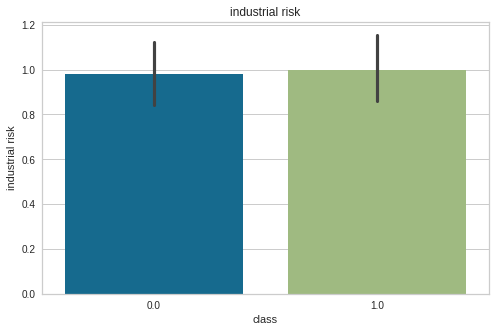

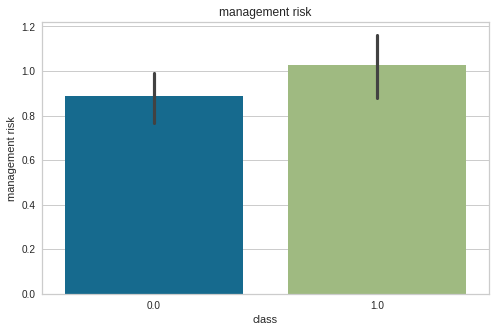

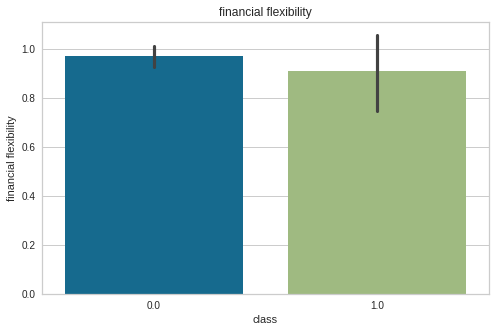

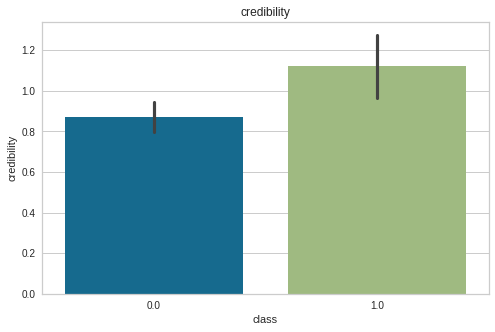

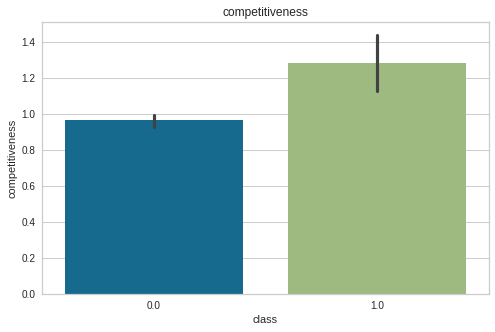

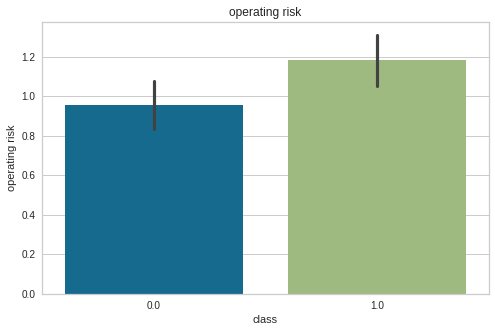

In [160]:
for column in ['industrial risk','management risk','financial flexibility','credibility','competitiveness','operating risk']:
  plt.figure(figsize=(8, 5))
  sns.barplot(data = new_data, x = 'class', y = column)
  plt.title(column)
  plt.show()

**The bar graphs above show the relationship between class and the other variables**

**checking for missing values**

In [161]:
new_data.isna().sum()

industrial risk          0
management risk          0
financial flexibility    0
credibility              0
competitiveness          0
operating risk           0
class                    0
dtype: int64

**using the describe function to check the statistical summary of dataset**

In [162]:
new_data.describe()

,industrial risk,management risk,financial flexibility,credibility,competitiveness,operating risk,class
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.991968,0.967871,0.935743,1.012048,1.144578,1.084337,0.570281
std,0.803179,0.723296,0.721143,0.790477,0.753474,0.732948,0.496033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


**plotting boxplots to check for outliers**

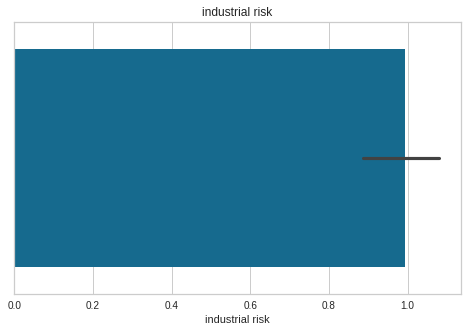

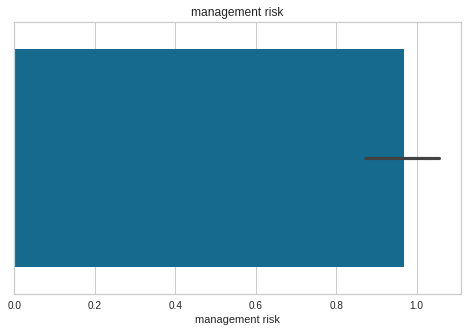

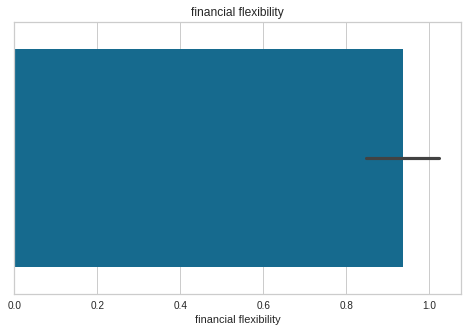

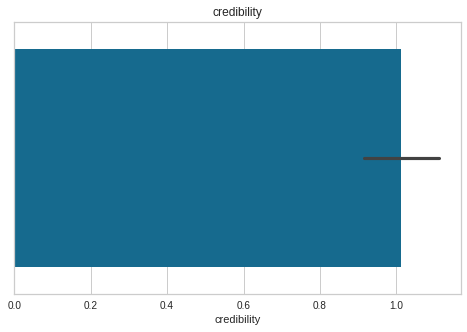

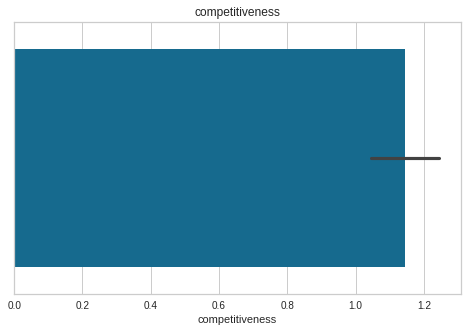

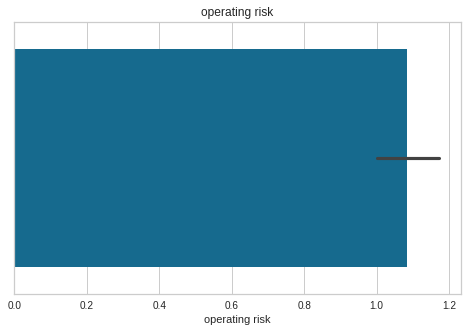

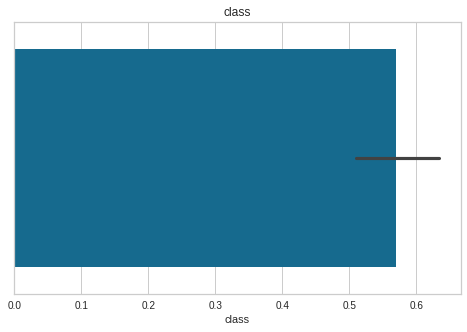

In [163]:
for column in ['industrial risk','management risk','financial flexibility','credibility','competitiveness','operating risk','class']:
  plt.figure(figsize=(8, 5))
  sns.barplot(data = new_data, x = column)
  plt.title(column)
  plt.show()

**using heat map to check for correlation between variables**

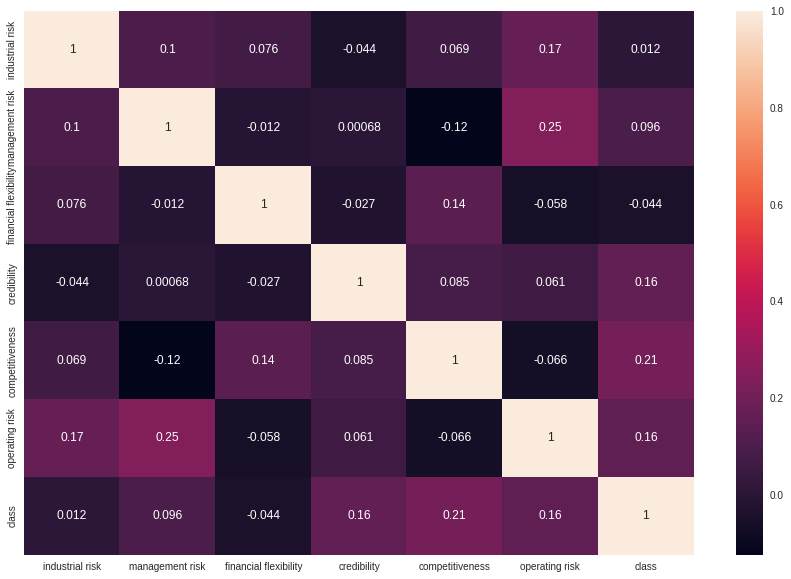

In [164]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_data.corr(), annot = True)

**splitting dataset into dependent and independent variables**

In [165]:
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

In [166]:
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

**using the variance inflation factor to check for multicollinearity**

In [167]:
calcu_mult(x)

,variables,VIF
0,industrial risk,2.515326
1,management risk,2.671497
2,financial flexibility,2.431737
3,credibility,2.349726
4,competitiveness,2.846612
5,operating risk,3.124592


In [168]:
y.value_counts()

1.0    142
0.0    107
Name: class, dtype: int64

**using the random under sampler to balance our categorical dependent variable in order to avoid bias in our model**

In [169]:
random = RandomOverSampler(random_state= 0)
x,y = random.fit_resample(x,y)

**splitting dataset into train and test**

In [170]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state=45)

**using the principal component analysis to display the important features**

In [171]:
pca = PCA(n_components=6)
pca_model = pca.fit(x)
PCA(n_components = 6)

PCA(n_components=6)

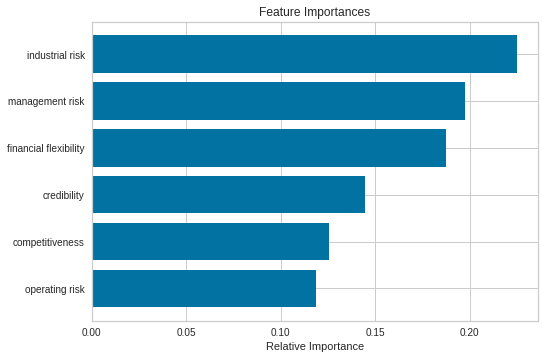

In [172]:
features = x.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**using elbow method to check for number of clusters in a dataset**

Text(0.5, 1.0, 'Elbow curve')

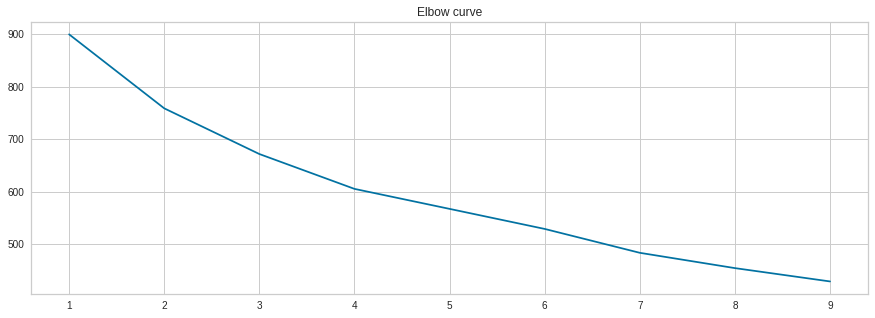

In [173]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

**using the silhouette visualizer to show the scores of each cluster in a single model**

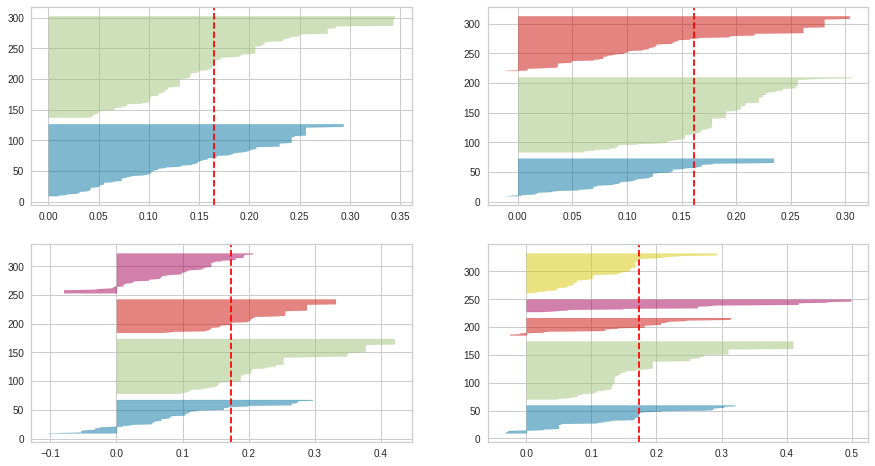

In [174]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

**fitting the dataset into the K Nearest Neighbor model**

In [187]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train)

**checking for the accuracy score**

In [188]:
knn_model.score(X_train, y_train)

0.9955947136563876

**predicting with the test**

In [189]:
y_predict = knn_model.predict(x_test)

**using the confusion matrix to display the four quadrants that show the true and false positive and negative classes**

In [190]:
confusion_matrix(y_test, y_predict)

array([[26,  0],
       [ 2, 29]])

**The confusion matrix above shows that the model was able to classify 26 out of 26 for Bankruptcy and 29 out of 31 for No bankruptcy**

**printing the precision,recall,and f1-score to determine how well the model has classified the dataset.**

In [191]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       1.00      0.94      0.97        31

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.96        57



**From the classification report above, we can see that Bankruptcy has an  score of 96% while No Bankruptcy has a score of 97% with an accuracy score of 96%**

**using the Repeated K Fold model to cross validate**

In [192]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(knn_model, x_test, y_test, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

0.8333333333333334

**The cross validation score above shows that our model has 83% accuracy of classifying if an organisation will go into bankruptcy or not.**